# Planets transiting oblate stars

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.patches import Circle, Ellipse
%matplotlib inline

In [2]:
import sympy as sp
from sympy import symbols, sin, cos, Matrix, Eq, Rational, Poly, floor, sqrt
from sympy import simplify, factorial, pi, binomial, factor, expand, collect, latex
from sympy.functions.special.tensor_functions import KroneckerDelta
from sympy import init_printing
from ipywidgets import *
from IPython.display import display, Math

## Circular case:

In [3]:
def draw(b, r):
    # Set up the figure
    fig, ax = pl.subplots(1, figsize=(4, 4))
    ax.set_xlim(min(-1.01, -r - 0.01), max(1.01, r + 0.01));
    ax.set_ylim(-1.01, max(1.01, b + r + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the two bodies
    occulted = Circle((0, 0), 1, fill=False, color='k')
    ax.add_artist(occulted)
    occultor = Circle((0, b), r, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b, 'ro')

    # Mark the points of intersection if they exist
    if np.abs(1 - r) < b and b < 1 + r:
        
        # Lambda
        lam = np.arcsin((1 - r * r + b * b) / (2 * b))
        x = np.cos(lam)
        y = np.sin(lam)
        pl.plot([0, x], [0, y], 'k-', alpha=0.3)
        pl.plot(x, y, 'ko', ms=5)
        pl.plot(-x, y, 'ko', ms=5)
        pl.plot([0, -x], [0, y], 'k-', alpha = 0.3)

        # Phi
        phi = np.arcsin((1 - r * r - b * b) / (2 * b * r))
        x = r * np.cos(phi)
        y = b + r * np.sin(phi)
        pl.plot([0, x], [b, y], 'r-', alpha=0.3)
        pl.plot(x, y, 'ro', ms=3)
        pl.plot(-x, y, 'ro', ms=3)
        pl.plot([0, -x], [b, y], 'r-', alpha = 0.3)

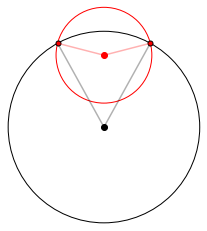

In [4]:
draw(0.75, 0.5)

## Oblate Case

Finding the points of intersection for an ellipsoid is MUCH harder. One of the reasons for this is that there is a special case in which a planet can intersect a star at 4 different points instead of just 2. 

Conceptually, we have two equations, an equation for a circle (planet) $f_c(x,y)$ and an ellipse (star) $f_e(x,y)$. We need to set these equal to each other and solve for x and y to find the points of intersection. 

$$f_c(x,y) = f_e(x,y)$$

In reality, the circle is centered on an arbitrary point ($x_0$, $y_0$) and the ellipse is squished into an ellipse projected onto the sky plane. 

Taking $R_{eq} = a = 1$, we can describe the star completely with semi-minor axis $b = (1-f)$. For simplicity, we can align the star's rotation axis with the y axis.


Lets demonstrate this:

In [5]:
def draw_oblate(b0, rp, f, theta):
    # Set up the figure
    #theta in degrees
    fig, ax = pl.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,theta, fill=False, color='k')
    ax.add_artist(occulted)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')

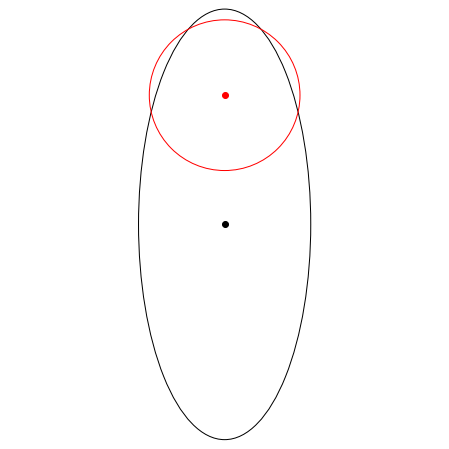

In [6]:
draw_oblate(0.60, 0.35,0.6,90) #theta in degrees

In [7]:
x0, y0, x, y = sp.symbols("x0 y0 x y",real=True)
b, r_p = sp.symbols("b r_p",real=True,positive=True)

### Equation for the (oblate) star:

In [8]:
y_ellipse = ((b)**2)*(1-x**2) #an ellipse centered at the origin with major axis on x axis
display(Math(r'y^2 = ' + latex(y_ellipse)))

<IPython.core.display.Math object>

### Equation for the (off-center, circular) planet:

In [9]:
y_circle = (r_p**2-(x-x0)**2)
display(Math(r'(y-y_0)^2 = ' + latex(y_circle)))

<IPython.core.display.Math object>

### Equation for intersection points:

Show $f_c(x,y) = f_e(x,y)$, with $f_c$ on LHS and $f_e$ on RHS:

In [10]:
display(Math(latex(y_circle-(y-y0)**2) + ' = ' + latex(y_ellipse-y**2)))

<IPython.core.display.Math object>

Now expand out $(y-y_0)^2$ as follows:

$$y^{2} - 2 y y_{0} + y_{0}^{2} = r_{p}^{2} - \left(x - x_{0}\right)^{2}$$

then, substitute $y^2$ with a function of x

In [11]:
y_squared = (r_p**2-(x-x0)**2) + 2*y*y0-y0
display(Math(r'y^2 = ' + latex(y_squared)))

<IPython.core.display.Math object>

Set $y^2$ terms equal to each other, and rearrange:

In [12]:
display(Math(latex(y_squared- y_ellipse) + r' = 0'))

<IPython.core.display.Math object>

Now finally, isolate for y and then plug y into the circle equation to get a quartic:

In [13]:
display(Math(r'y = ' + latex(sp.solve((y_ellipse - y_squared), y)[0])))

<IPython.core.display.Math object>

In [14]:
quartic = (sp.solve((y_ellipse - y_squared), y)[0])**2 - y_circle
quartic = collect(expand(quartic),x)
quartic

b**4/(4*y0**2) - b**2*r_p**2/(2*y0**2) + b**2*x0**2/(2*y0**2) + b**2/(2*y0) + r_p**4/(4*y0**2) - r_p**2*x0**2/(2*y0**2) - r_p**2 - r_p**2/(2*y0) + x**4*(b**4/(4*y0**2) - b**2/(2*y0**2) + 1/(4*y0**2)) + x**3*(b**2*x0/y0**2 - x0/y0**2) + x**2*(-b**4/(2*y0**2) + b**2*r_p**2/(2*y0**2) - b**2*x0**2/(2*y0**2) - b**2/(2*y0) + b**2/(2*y0**2) - r_p**2/(2*y0**2) + 3*x0**2/(2*y0**2) + 1 + 1/(2*y0)) + x*(-b**2*x0/y0**2 + r_p**2*x0/y0**2 - x0**3/y0**2 - 2*x0 - x0/y0) + x0**4/(4*y0**2) + x0**2 + x0**2/(2*y0) + 1/4

Finally, we have a polynomial of the form: $$Ax^4 + Bx^3 + Cx^2 + Dx + E = 0$$

where A, B, C, D and E are given below (yes it's complicated):

In [15]:
A, B, C, D, E = Poly(quartic,x).coeffs()

In [16]:
display(Math(r'A = ' + latex(simplify(collect(A*4*y0**2, b)))))

<IPython.core.display.Math object>

In [17]:
display(Math(r'B = ' + latex(collect(B*4*y0**2,b))))

<IPython.core.display.Math object>

In [18]:
display(Math(r'C = ' + latex(collect(C*4*y0**2,b))))

<IPython.core.display.Math object>

In [19]:
display(Math(r'D = ' + latex(collect(D*4*y0**2,b))))

<IPython.core.display.Math object>

In [20]:
display(Math(r'E = ' + latex(collect(E*4*y0**2,b))))

<IPython.core.display.Math object>

Define helper functions to find intersection points of ellipse and circle:

In [21]:
def quartic_poly(x, b0, r_p, f, theta):

    x0 = b0*np.sin((theta))
    y0 = b0*np.cos((theta))
    b = 1-f
    A = b**4 - 2*b**2 + 1
    B = 4*x0*(b**2 - 1)
    C = -2*b**4 + 2*b**2*(r_p**2 - x0**2 - y0 + 1) - 2*r_p**2 + 6*x0**2 + 4*y0**2 + 2*y0
    D = 4*x0*(-b**2 + r_p**2 - x0**2 - 2*y0**2 - y0)
    E = (b**4 + 2*b**2*(-r_p**2 + x0**2 + y0) 
         + r_p**4 - 2*r_p**2*x0**2 - 4*r_p**2*y0**2 
         - 2*r_p**2*y0 + x0**4 + 4*x0**2*y0**2 + 2*x0**2*y0 + y0**2)
    
    return (A*x**4 + B*x**3 + C*x**2 + D*x + E)

def quartic_poly_2(x, b0, r_p, f, theta):
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    A, B, C, D, E = coeffs(1-f,x0,y0,r_p)
    return (A*x**4 + B*x**3 + C*x**2 + D*x + E)

def coeffs(b, xo, yo, ro):
    A = (1 - b ** 2) ** 2
    B = -4 * xo * (1 - b ** 2)
    C = -2 * (b ** 4 + ro ** 2 - 3 * xo ** 2 - yo ** 2 - b ** 2 * (1 + ro ** 2 - xo ** 2 + yo ** 2))
    D = -4 * xo * (b ** 2 - ro ** 2 + xo ** 2 + yo ** 2)
    E = b ** 4 - 2 * b ** 2 * (ro ** 2 - xo ** 2 + yo ** 2) + (ro ** 2 - xo ** 2 - yo ** 2) ** 2
    return np.array([A, B, C, D, E])


def find_intersections(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    b = (1.0-f)
    A = b**4 - 2*b**2 + 1
    B = 4*x0*(b**2 - 1)
    C = -2*b**4 + 2*b**2*(r_p**2 - x0**2 - y0 + 1) - 2*r_p**2 + 6*x0**2 + 4*y0**2 + 2*y0
    D = 4*x0*(-b**2 + r_p**2 - x0**2 - 2*y0**2 - y0)
    E = (b**4 + 2*b**2*(-r_p**2 + x0**2 + y0) 
         + r_p**4 - 2*r_p**2*x0**2 - 4*r_p**2*y0**2 
         - 2*r_p**2*y0 + x0**4 + 4*x0**2*y0**2 + 2*x0**2*y0 + y0**2)
    return np.roots(np.array([A,B,C,D,E])), np.polyval(np.abs([A,B,C,D,E]),np.abs(np.roots(np.array([A,B,C,D,E]))))

def find_intersections_2(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    coeff = coeffs(1-f,x0,y0,r_p)
    return np.roots(coeff), np.polyval(np.abs(coeff),np.abs(np.roots(coeff)))
def circle_err(x, y, b0, rp, theta):
    return np.abs((y-b0*np.cos(theta))**2-(rp**2 - (x-b0*np.sin(theta))**2))

Update the plotting function so it plots the intersection points:

In [22]:
def draw_oblate(b0, rp, f, theta):
    # Set up the figure
    fig, ax = pl.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,np.degrees(theta), fill=False, color='k')
    ax.add_artist(occulted)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')
    
    roots, err = find_intersections_2(b0, rp, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    if len(roots)>0:
        #Lambda
        for x_root in roots_real:
            x_root = np.real(x_root)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x = r*np.cos(lam_pos)
            y = r*np.sin(lam_pos)
            
            x_neg = r*np.cos(lam_neg)
            y_neg = r*np.sin(lam_neg)
            special = False
            if circle_err(x, y, b0, rp, theta) > circle_err(x_neg, y_neg, b0, rp, theta):
                x = x_neg
                y = y_neg
            elif np.isclose(circle_err(x, y, b0, rp, theta), circle_err(x_neg, y_neg, b0, rp, theta),atol=1e-8):
                #90 degree case, or too close to tell
                special = True
            
            def rot(x,y, theta):
                #return x,y rotated back into the standard reference frame F
                return (x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta))
            def rot_Fprime(b0, theta):
                #return (0,b0) rotated to the integral reference frame F'
                return (x*np.cos(theta) + y*np.sin(theta), -x*np.sin(theta) + y*np.cos(theta))   
            

            pl.plot([0, rot(x, y, theta)[0]], [0, rot(x, y, theta)[1]], 'k-', alpha=0.3)
            pl.plot(rot(x, y, theta)[0], rot(x, y, theta)[1], 'ko', ms=5)
            pl.plot([0,rot(x, y, theta)[0]],[b0, rot(x, y, theta)[1]], 'r-', alpha=0.3)
            if special:
                pl.plot([0, rot(x_neg, y_neg, theta)[0]], [0, rot(x_neg, y_neg, theta)[1]], 'k-', alpha=0.3)
                pl.plot(rot(x_neg, y_neg, theta)[0], rot(x_neg, y_neg, theta)[1], 'ko', ms=5)
                pl.plot([0,rot(x_neg, y_neg, theta)[0]],[b0, rot(x_neg, y_neg, theta)[1]], 'r-', alpha=0.3)

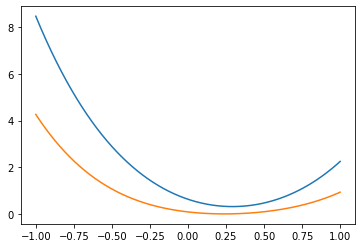

In [23]:
#for some reason, my function to find the polynomial coefficients diverges significantly from Rodrigo's
#even though they seem completely equivalent except for bunching terms
x = np.linspace(-1,1,10000)
pl.plot(x, quartic_poly(x, 0.80, 0.35,0.6,np.radians(20)))
pl.plot(x, quartic_poly_2(x, 0.80, 0.35,0.6,np.radians(20)))

## Case 1 (4 points of intersection):

This is a rather pathological scenario where there are actually 4 points of intersection. See some examples below. Probably can be ignored in real life cases, but you never know. 

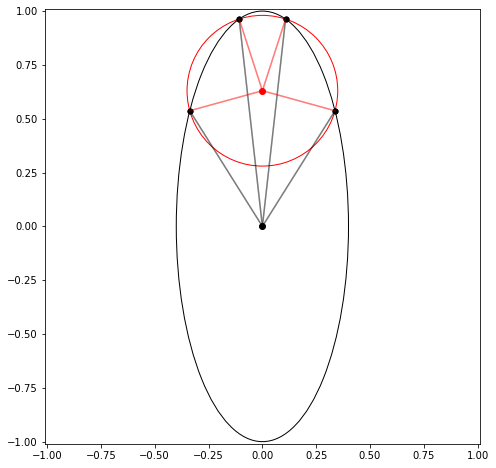

In [24]:
draw_oblate(0.63, 0.35,0.6,np.radians(90))

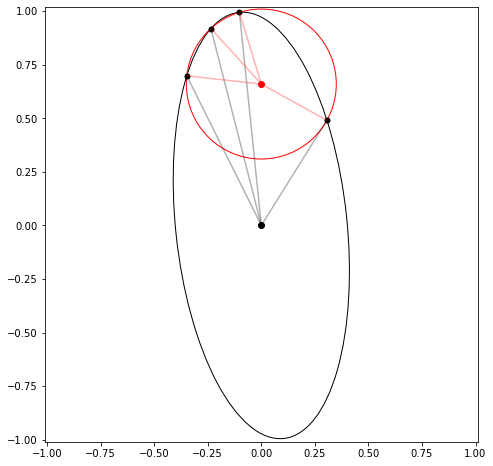

In [25]:
draw_oblate(0.66, 0.35,0.6,np.radians(96))

## Case 2 (2 points of intersection)

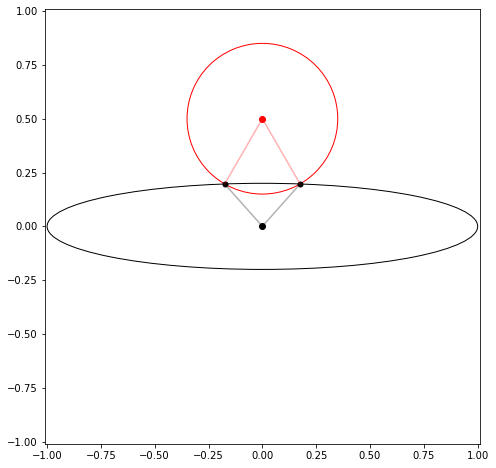

In [26]:
draw_oblate(0.50, 0.35,0.8,np.radians(0))

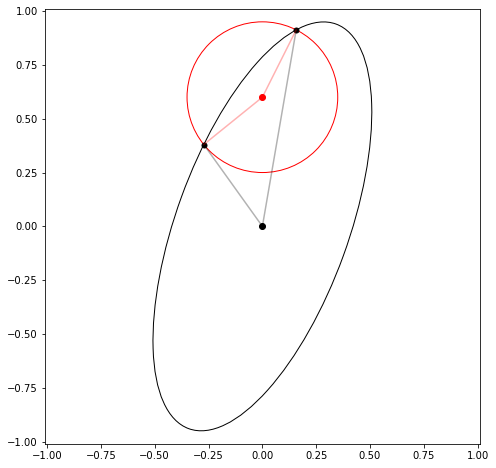

In [27]:
draw_oblate(0.60, 0.35,0.6,np.radians(70))

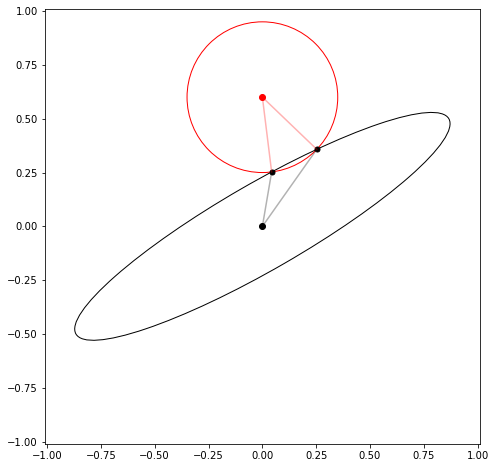

In [28]:
draw_oblate(0.60, 0.35,0.8,np.radians(30))

### Finding the $\xi$ angle

The way the intersections are parametrized in Luger et al. (in prep) is not the same as shown above. Instead, the angles are parametrized by an angular parameter similar to eccentric anomaly. However, this is easy to get from our calculations above, with only minor modifications to the original function. 

In [29]:
def draw_oblate_squiggly(b0, rp, f, theta):
    
    """theta in radians"""
    # Set up the figure
    fig, ax = pl.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,np.degrees(theta), fill=False, color='k')
    occulted_circ = Circle((0, 0), 1.0, fill=False, color='b')
    ax.add_artist(occulted)
    ax.add_artist(occulted_circ)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')
    
    roots, err = find_intersections_2(b0, rp, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #Xi
        for x_root in roots_real:
            x_root = np.real(x_root)
            
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            
            xi = np.arctan2(np.sqrt(1-x_root**2),x_root)
            xi_neg = np.arctan2(-np.sqrt(1-x_root**2),x_root)
            
            x = np.cos(xi)
            y = np.sin(xi)           

            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            
            special = False
            if circle_err(x_int, y_int, b0, rp, theta) > circle_err(x_int_neg, y_int_neg, b0, rp, theta):
                x_int = x_int_neg
                y_int = y_int_neg
                x = np.cos(xi_neg)
                y = np.sin(xi_neg)
            elif np.isclose(circle_err(x_int, y_int, b0, rp, theta), circle_err(x_int_neg, y_int_neg, b0, rp, theta),atol=1e-8):
                #90 degree case, or too close to tell
                special = True
            
            
            def rot(x,y, theta):
                #return x,y rotated back into the standard reference frame F
                return (x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta))
            #plot the intersection points and draw a blue line from the origin to the outer radius of the bounding circle
            pl.plot([0, rot(x, y, theta)[0]], [0, rot(x, y, theta)[1]], 'b-', alpha=0.3)
            pl.plot(rot(x, y, theta)[0], rot(x, y, theta)[1], 'ko', ms=5)
            pl.plot(rot(x_int, y_int, theta)[0], rot(x_int, y_int, theta)[1], 'ko', ms=5)
            
            #plot the red line from center of planet to intersectioon points
            pl.plot([0,rot(x_int, y_int, theta)[0]],[b0, rot(x_int, y_int, theta)[1]], 'r-', alpha=0.3)

            xs = [rot(x, y, theta)[0],rot(x, 0, theta)[0]]
            ys = [rot(x, y, theta)[1],rot(x, 0, theta)[1]]
            
            smax = [rot(-1, 0, theta)[0], rot(1, 0, theta)[0]]
            smay = [rot(-1, 0, theta)[1], rot(1, 0, theta)[1]]
            pl.plot(xs, ys, 'k-', alpha=0.4)
            pl.plot(smax, smay, 'k-', alpha=0.4)

            angles.append(xi)
        return np.degrees(angles)

array([38.55816779, 83.69452538])

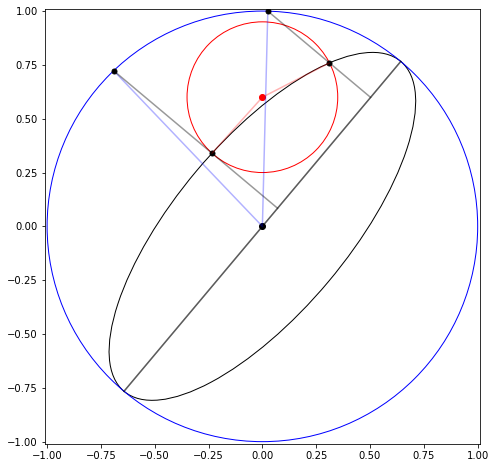

In [30]:
draw_oblate_squiggly(0.60, 0.35,0.6,np.radians(50))

array([22.53583693, 28.64820001, 55.08405996, 61.19642305])

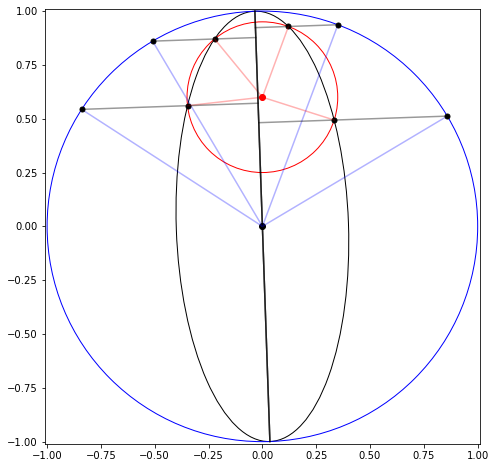

In [31]:
draw_oblate_squiggly(0.60, 0.35,0.6,np.radians(92))

## Numerical and Analytic Integration!

Code taken from Luger et. al and modified for oblate star and circular planet.

Let's find the parameters of integration $\xi$ and $\phi$

In [32]:
def compute_xi(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    roots, err = find_intersections_2(b0, r_p, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #Xi
        for x_root in roots_real:
            #x value of intersection point
            x_root = np.real(x_root)
            
            #find angles of intersection on ellipse of a=1 and b=(1-f)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            
            xi = np.arctan2(np.sqrt(1-x_root**2),x_root)
            xi_neg = np.arctan2(-np.sqrt(1-x_root**2),x_root)     
            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            if circle_err(x_int, y_int, b0, r_p, theta) > circle_err(x_int_neg, y_int_neg, b0, r_p, theta):
                xi = xi_neg
                print("Xi neg: " + str(xi_neg))
                
            angles.append(xi)
    return np.array(angles)

def compute_phi(b0, r_p, f, theta):
    roots, err = find_intersections_2(b0, r_p, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #phi
        for x_root in roots_real:
            #x value of intersection point
            x_root = np.real(x_root)
            
            def rot(b0, theta):
                #return (0,b0) rotated to the integral reference frame F'
                return (b0*np.sin(theta), b0*np.cos(theta))   
            
            #find angles of intersection on ellipse of a=1 and b=(1-f)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            x0, y0 = rot(b0, theta)  
            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            
            phi = theta + np.arctan2(y_int-y0,x_root-x0)
            phi_neg = (theta - np.arctan2(-(y_int_neg-y0),x_root-x0))
            
            if circle_err(x_int, y_int, b0, r_p, theta) > circle_err(x_int_neg, y_int_neg, b0, r_p, theta):
                phi = phi_neg
                print("Phi neg")
                
            print(x_int,y_int)
            angles.append(phi)
    return np.array(angles)

### Green's theorem:

We separately found a function $\vec{G}(x, y, f)$ such that the exterior derivative of $\vec{G}$ gives $g(x, y')$, where $y'=y/(1-f)$. Let's code up that function here:

In [33]:
def G(n, f):
    """
    Return the anti-exterior derivative of the nth term of the Green's basis.
    This is a two-dimensional (Gx, Gy) vector of functions of x and y.
    
    
    """

    # Get the mu, nu indices
    l = int(np.floor(np.sqrt(n)))
    m = n - l * l - l
    mu = l - m
    nu = l + m

    # NOTE: The abs prevents NaNs when the argument of the sqrt is
    # zero but floating point error causes it to be ~ -eps.
    z = lambda x, y: np.maximum(1e-12, np.sqrt(np.abs(1 - x ** 2 - (y/(1-f)) ** 2)))

    if nu % 2 == 0:
        
        G = [lambda x, y: 0, lambda x, y: x ** (0.5 * (mu + 2)) * (y/(1-f)) ** (0.5 * nu)]
    
    elif (l == 1) and (m == 0):

        def G0(x, y):
            z_ = z(x, y)
            if z_ > 1 - 1e-8:
                return -0.5 * y
            else:
                return (1 - z_ ** 3) / (3 * (1 - z_ ** 2)) * (-y)

        def G1(x, y):
            z_ = z(x, y)
            if z_ > 1 - 1e-8:
                return 0.5 * x
            else:
                return (1 - z_ ** 3) / (3 * (1 - z_ ** 2)) * x

        G = [G0, G1]

    elif (mu == 1) and (l % 2 == 0):
        
        G = [lambda x, y: (1-f) * x ** (l - 2) * z(x, y) ** 3, lambda x, y: 0]
    
    elif (mu == 1) and (l % 2 != 0):
        
        G = [lambda x, y: (1-f) * x ** (l - 3) * y * z(x, y) ** 3, lambda x, y: 0]
    
    else:
        
        G = [
            lambda x, y: 0,
            lambda x, y: x ** (0.5 * (mu - 3))
            * (y / (1-f)) ** (0.5 * (nu - 1))
            * z(x, y) ** 3,
        ]
        
    return G

Let's define some helper functions to compare:

- A brute force integral where we find the amount of light blocked by creating a grid of points on the surface of the star and seeing how many points are blocked under the planet. 

- A semi-analytic integral where we use the function G(x, y, f) we found earlier and do a numeric line integral over it. 

In [34]:
def g(x, y, z=None, n=0):
    """
    Return the nth term of the Green's basis (a scalar).
    
    """
    if z is None:
        z = np.sqrt(1 - x ** 2 - y ** 2)
    l = int(np.floor(np.sqrt(n)))
    m = n - l * l - l
    mu = l - m
    nu = l + m
    if (nu % 2 == 0):
        I = [mu // 2]
        J = [nu // 2]
        K = [0]
        C = [(mu + 2) // 2]
    elif (l == 1) and (m == 0):
        I = [0]
        J = [0]
        K = [1]
        C = [1]
    elif (mu == 1) and (l % 2 == 0):
        I = [l - 2]
        J = [1]
        K = [1]
        C = [3]
    elif (mu == 1):
        I = [l - 3, l - 1, l - 3]
        J = [0, 0, 2]
        K = [1, 1, 1]
        C = [-1, 1, 4]
    else:
        I = [(mu - 5) // 2, (mu - 5) // 2, (mu - 1) // 2]
        J = [(nu - 1) // 2, (nu + 3) // 2, (nu - 1) // 2]
        K = [1, 1, 1]
        C = [(mu - 3) // 2, -(mu - 3) // 2, -(mu + 3) // 2]
    res = 0
    for i, j, k, c in zip(I, J, K, C):
        res += c * x ** i * y ** j * z ** k
    return res

def primitive(x, y, dx, dy, theta1, theta2, b, n=0):
    """A general primitive integral computed numerically."""

    def func(theta):
        f = 1-b
        Gx, Gy = G(n, f)
        return Gx(x(theta), y(theta)) * dx(theta) + Gy(x(theta), y(theta)) * dy(theta)

    res, _ = quad(func, theta1, theta2, epsabs=1e-12, epsrel=1e-12)
    return res



def tT_numerical(xi, b, theta, n=0):
    """Compute the tT integral numerically from its integral definition."""
    res = 0
    for xi1, xi2 in xi.reshape(-1, 2):
        x = lambda xi: np.cos(theta) * np.cos(xi) - b * np.sin(theta) * np.sin(xi)
        y = lambda xi: np.sin(theta) * np.cos(xi) + b * np.cos(theta) * np.sin(xi)
        dx = lambda xi: -np.cos(theta) * np.sin(xi) - b * np.sin(theta) * np.cos(xi)
        dy = lambda xi: -np.sin(theta) * np.sin(xi) + b * np.cos(theta) * np.cos(xi)
        res += primitive(x, y, dx, dy, xi1, xi2, b,  n)
    return res

def pT(phi, bo, ro, b, n=0):
    """Compute the pT integral numerically from its integral definition."""
    res = 0
    for phi1, phi2 in phi.reshape(-1, 2):
        x = lambda phi: ro * np.cos(phi)
        y = lambda phi: bo + ro * np.sin(phi)
        dx = lambda phi: -ro * np.sin(phi)
        dy = lambda phi: ro * np.cos(phi)
        res += primitive(x, y, dx, dy, phi1, phi2, b, n)
    return res

def sT(phi, xi, f, theta, b0, rp, n=0):
    """The solution vector for occultations, computed via Green's theorem."""
    b=1-f
    return pT(phi, b0, rp, b, n) + tT_numerical(xi, b, theta, n)

def sT_bruteforce(f, theta, bo, ro, n=0, res=300):

    b=1-f
    # Create a fine grid
    pts = np.linspace(-1, 1, res)
    x, y = np.meshgrid(pts, pts)

    # Check if a point is inside the ellipse of the star
    xr = x * np.cos(theta) + y * np.sin(theta)
    yr = -x * np.sin(theta) + y * np.cos(theta)
    in_star = (xr ** 2) + (yr ** 2)/b**2 <= 1

    # Check if a point is under the occultor
    under_occultor = x ** 2 + (y - bo) ** 2 <= ro ** 2

    
    # Now, compute the nth term in the basis...
    term = g(x, y/(1-f), n=n)
    
    # And sum it over the integration region
    # Each pixel has area dA = (area of square) / (number of pixels)
    dA = 4 / (x.shape[0] * x.shape[1])
    integral = np.nansum(term[in_star & under_occultor] * dA)
    
    return integral

## Integral comparison:

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from IPython.display import Latex
from scipy.special import binom

### Circular case

Let's start by setting f = 0, so the star is a circle. We still parametrize the star as an ellipse, but it just happens to have no oblateness. Let's see if the brute force integral and the analytic integral match:

Here is the drawing of the system:

Xi neg: -0.00836766665650712
Phi neg
0.9999649912816331 0.008367569009184096
0.8040703380657361 0.5945341802141008


array([ 0.47943198, 36.47943198])

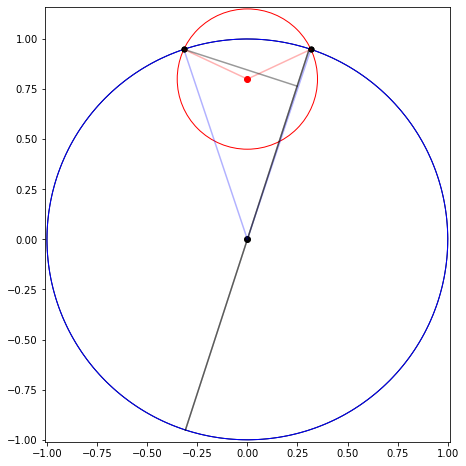

In [36]:
f = 0.0
b0 = 0.8
r_p = 0.35
theta = np.radians(72)
xi = compute_xi(b0, r_p, f, theta)
phi = compute_phi(b0, r_p, f, theta)
draw_oblate_squiggly(b0, r_p,f,theta)

In [37]:
f = 0.0
b0 = 0.8
r_p = 0.35
theta = np.radians(72)

from tqdm.notebook import tqdm
numerical_circ = np.zeros(16)
for n in tqdm(range(16)):
    numerical_circ[n] = sT_bruteforce(f, theta, b0, r_p, n=n, res=1000)

/Users/shashank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [38]:
semi_analytic_circ = np.zeros(16)

xi = compute_xi(b0, r_p, f, theta)
phi = compute_phi(b0, r_p, f, theta)
xi_2pi = np.sort(np.mod(xi+np.pi, 2*np.pi)-np.pi)
phi_2pi = np.pi/2 + np.sort(np.mod(phi-np.pi/2, 2*np.pi))
phi = compute_phi(b0, r_p, f, theta)
print("Xi: " + str(np.degrees(xi)))
print("Xi wrapped: " + str(np.degrees(xi_2pi)))
print("Xi subtends: " + str(np.degrees(xi_2pi[1]-xi_2pi[0])))
print("Phi: " + str(np.degrees(phi)))
print("Phi wrapped: " + str(np.degrees(phi_2pi)))
print("Phi wrapped subtends: " + str(np.degrees(phi_2pi[1]-phi_2pi[0])))
for n in tqdm(range(16)):
    semi_analytic_circ[n] = sT(phi_2pi, xi_2pi, f, theta, b0, r_p, n=n)

Xi neg: -0.00836766665650712
Phi neg
0.9999649912816331 0.008367569009184096
0.8040703380657361 0.5945341802141008
Phi neg
0.9999649912816331 0.008367569009184096
0.8040703380657361 0.5945341802141008
Xi: [-0.47943198 36.47943198]
Xi wrapped: [-0.47943198 36.47943198]
Xi subtends: 36.95886396757687
Phi: [ 25.09416155 154.90583845]
Phi wrapped: [154.90583845 385.09416155]
Phi wrapped subtends: 230.188323091604


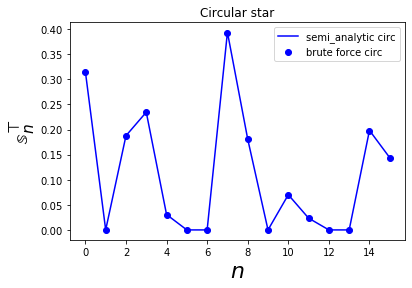

In [39]:
plt.plot(semi_analytic_circ,'b-', label="semi_analytic circ")
plt.plot(numerical_circ,'bo', label="brute force circ")

plt.legend()

plt.title("Circular star")
plt.xlabel(r"$n$", fontsize=22)
plt.ylabel(r"$\mathbb{s}_n^\top$", fontsize=22);

### Elliptical Case

Xi neg: -0.012003446283540607
Phi neg
0.9999279595036478 0.008402210626189448
0.6018603664816161 0.5590209375655989


array([ 0.68774681, 52.99674691])

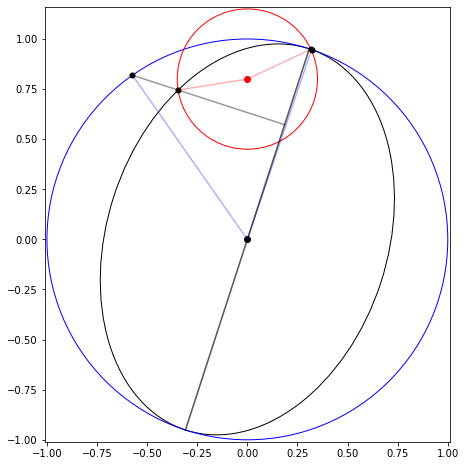

In [40]:
f = 0.3
b0 = 0.8
r_p = 0.35
theta = np.radians(72)
xi = compute_xi(b0, r_p, f, theta)
phi = compute_phi(b0, r_p, f, theta)
draw_oblate_squiggly(b0, r_p,f,theta)

In [41]:
f = 0.3
b0 = 0.8
r_p = 0.35
theta = np.radians(72)

from tqdm.notebook import tqdm
numerical = np.zeros(16)
for n in tqdm(range(16)):
    numerical[n] = sT_bruteforce(f, theta, b0, r_p, n=n, res=1000)

/Users/shashank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [42]:
semi_analytic = np.zeros(16)

xi = compute_xi(b0, r_p, f, theta)
phi = compute_phi(b0, r_p, f, theta)
xi_2pi = np.sort(np.mod(xi+np.pi, 2*np.pi)-np.pi)
phi_2pi = np.pi/2 + np.sort(np.mod(phi-np.pi/2, 2*np.pi))
phi = compute_phi(b0, r_p, f, theta)
print("Xi: " + str(np.degrees(xi)))
print("Xi wrapped: " + str(np.degrees(xi_2pi)))
print("Xi subtends: " + str(np.degrees(xi_2pi[1]-xi_2pi[0])))
print("Phi: " + str(np.degrees(phi)))
print("Phi wrapped: " + str(np.degrees(phi_2pi)))
print("Phi wrapped subtends: " + str(np.degrees(phi_2pi[1]-phi_2pi[0])))
for n in tqdm(range(16)):
    semi_analytic[n] = sT(phi_2pi, xi_2pi, f, theta, b0, r_p, n=n)

Xi neg: -0.012003446283540607
Phi neg
0.9999279595036478 0.008402210626189448
0.6018603664816161 0.5590209375655989
Phi neg
0.9999279595036478 0.008402210626189448
0.6018603664816161 0.5590209375655989
Xi: [-0.68774681 52.99674691]
Xi wrapped: [-0.68774681 52.99674691]
Xi subtends: 53.684493716898956
Phi: [ 25.08586038 189.01620071]
Phi wrapped: [189.01620071 385.08586038]
Phi wrapped subtends: 196.0696596771726


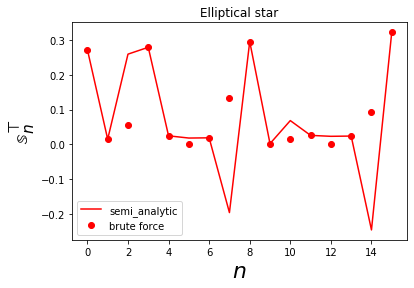

In [43]:
plt.plot(semi_analytic,'r-', label="semi_analytic")
plt.plot(numerical,'ro', label="brute force")
plt.legend()

plt.
plt.title("Elliptical star")
plt.xlabel(r"$n$", fontsize=22)
plt.ylabel(r"$\mathbb{s}_n^\top$", fontsize=22);